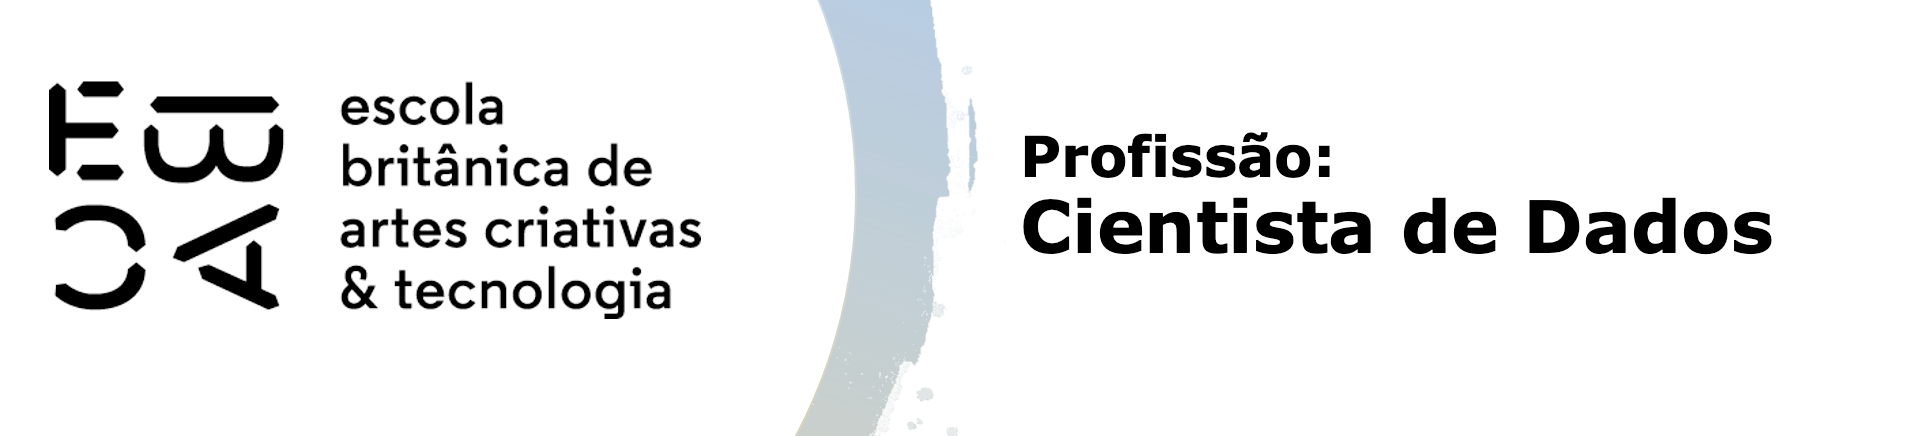

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [3]:
# Determinando a variável com as colunas de interesse
colunas_selecionadas = df.columns[[0,1,2,3,6,17]]
colunas_selecionadas

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'BounceRates', 'Revenue'],
      dtype='object')

In [4]:
# Obtendo uma cópia do dataset com as culnas de interesse
df_filtro = df[colunas_selecionadas].copy()
df_filtro.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  BounceRates  Revenue  
0                     0.0         0.20    False  
1                     0.0         0.00    False  
2                     0.0         0.20    False  
3                     0.0         0.05    False  
4                     0.0         0.02    False

In [5]:
# Verificando presença de valores faltantes
df_filtro.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
BounceRates                0
Revenue                    0
dtype: int64

In [6]:
# Divisão das variáveis dependentes
y1 = df_filtro[df_filtro.columns[-1]].to_frame()
y2 = df_filtro[df_filtro.columns[-2]].to_frame()
display(y1.head())
display(y2.head())

Revenue
0    False
1    False
2    False
3    False
4    False

BounceRates
0         0.20
1         0.00
2         0.20
3         0.05
4         0.02

In [7]:
# Divisão das variáveis independentes
X = df_filtro[df_filtro.columns[:-2]]
X.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

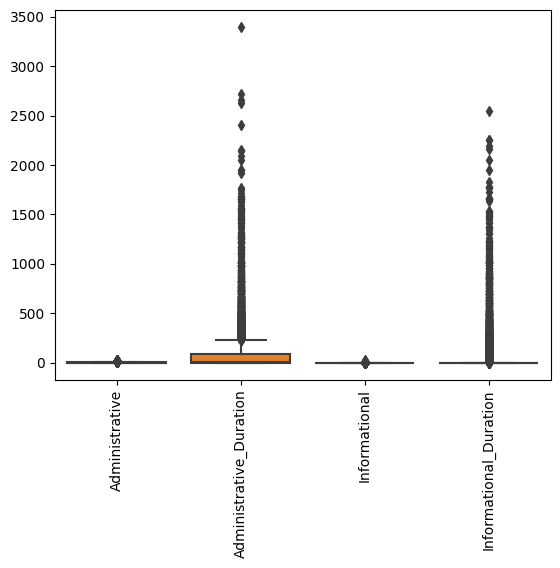

In [8]:
# Verificando a escala de valores
ax = sns.boxplot(X)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [9]:
# Padronização das escalas dos dados 
X_pad = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X_pad.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  
0               -0.244931  
1               -0.244931  
2               -0.244931  
3               -0.244931  
4               -0.244931

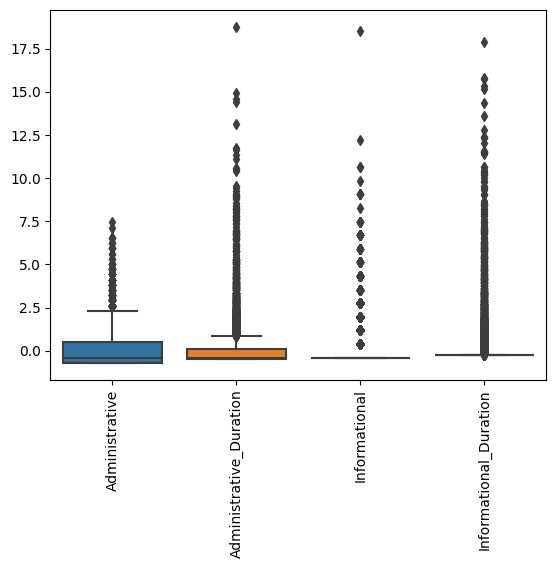

In [10]:
# Verificando a escala de valores
ax = sns.boxplot(X_pad)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

# Testes no Revenue

In [11]:
X_train, X_t, y_train, y_t = train_test_split(X_pad, y1, test_size=0.33, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_t, y_t, test_size=0.9, random_state=42)
print(f"X_train: {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"X_valid: {X_valid.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test : {y_test.shape}")
print(f"y_valid: {y_valid.shape}")

X_train: (8261, 4)
X_test : (406, 4)
X_valid: (3663, 4)
y_train: (8261, 1)
y_test : (406, 1)
y_valid: (3663, 1)


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

### Cotovelo

In [12]:
SQD = []
K = range(1,15)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    SQD.append(km.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]

<Axes: xlabel='num_clusters'>

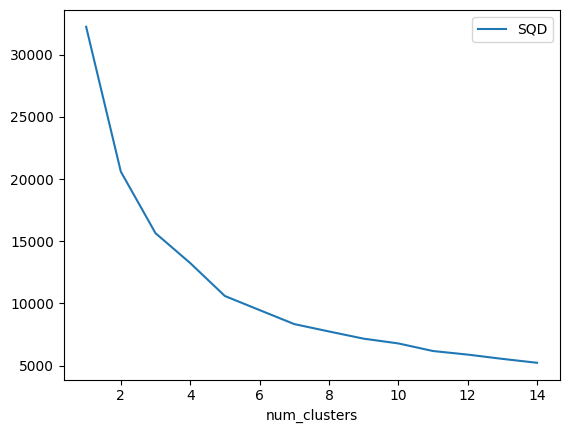

In [13]:
df = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df.plot(x = 'num_clusters', y = 'SQD')

### Sinueta

In [14]:

# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 10
X_train_sinu = X_train.copy()

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters).fit(X_train)
    # Aqui calculamos a silueta e guardamos o resultado na lista 'siluetas'
    siluetas.append(silhouette_score(X_train, km.labels_))
    # Essa list comprehendion define o nome dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    X_train_sinu['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)


  0%|          | 0/9 [00:00<?, ?it/s]

<Axes: xlabel='n_clusters'>

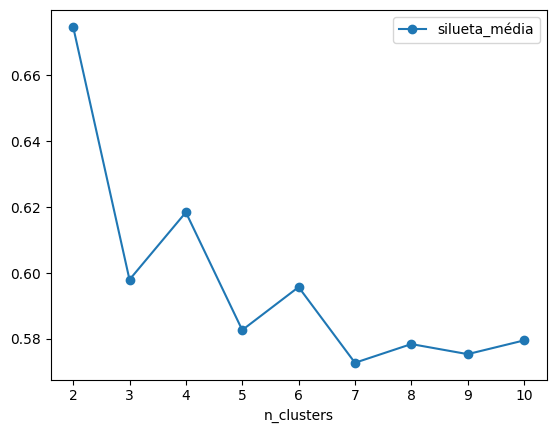

In [15]:

df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')
# plt.scatter(x = df_silueta.n_clusters, y = df_silueta.silueta_média)

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [16]:
X_train_sinu['y'] = y_train.copy()
X_train_sinu.head()

Administrative  Administrative_Duration  Informational  \
5396        0.507228                 0.957060      -0.396478   
611         4.119891                 1.325586       4.327541   
4474       -0.696993                -0.457191      -0.396478   
2114       -0.094882                -0.287481      -0.396478   
8957        2.012504                 3.724044      -0.396478   

      Informational_Duration grupos_2 grupos_3 grupos_4 grupos_5 grupos_6  \
5396               -0.244931  grupo_1  grupo_2  grupo_3  grupo_1  grupo_0   
611                 0.805680  grupo_0  grupo_1  grupo_2  grupo_4  grupo_2   
4474               -0.244931  grupo_1  grupo_0  grupo_0  grupo_0  grupo_1   
2114               -0.244931  grupo_1  grupo_0  grupo_0  grupo_0  grupo_1   
8957               -0.244931  grupo_0  grupo_2  grupo_3  grupo_2  grupo_3   

     grupos_7 grupos_8 grupos_9 grupos_10      y  
5396  grupo_0  grupo_0  grupo_1   grupo_5  False  
611   grupo_5  grupo_7  grupo_0   grupo_4  False  
4474  grupo_1  grupo_1  grupo_7   grupo_0  False  
2114  grupo_1  grupo_1  grupo_7   grupo_0  False  
8957  grupo_2  grupo_4  grupo_5   grupo_9  False

### Grupo 5

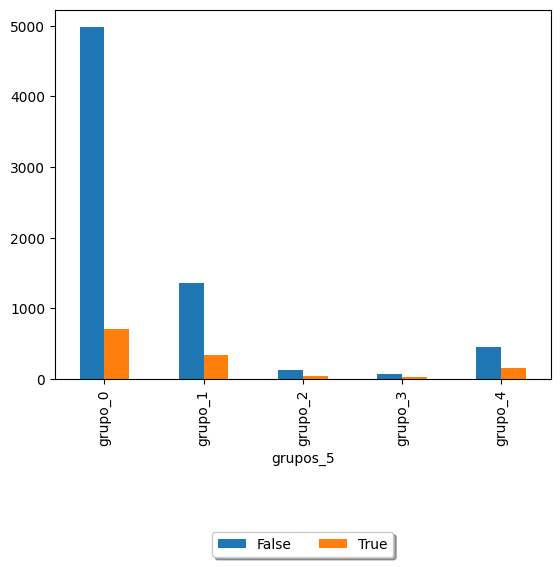

In [17]:
grupos = 'grupos_5'
ax = X_train_sinu.groupby([grupos, 'y'])['y'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

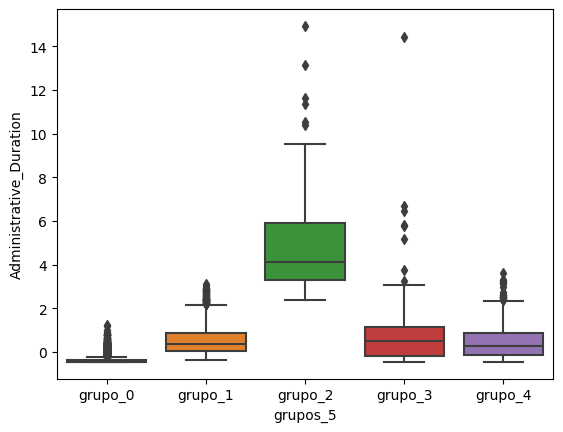

In [18]:
sns.boxplot(data=X_train_sinu, y=X_train_sinu.columns[1], x=grupos)
plt.show()

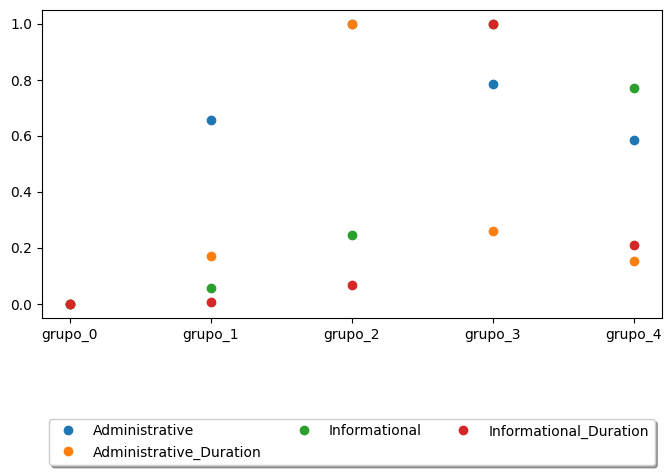

In [19]:
variaveis = X_train_sinu.columns[:4]
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_train_sinu.groupby([grupos])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [20]:
pd.crosstab(X_train_sinu['y'], X_train_sinu[grupos])

grupos_5  grupo_0  grupo_1  grupo_2  grupo_3  grupo_4
y                                                    
False        4978     1363      123       70      452
True          707      342       43       29      154

In [21]:
variaveis = list(X_train_sinu.columns[:4])
variaveis.append(grupos)
variaveis

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'grupos_5']

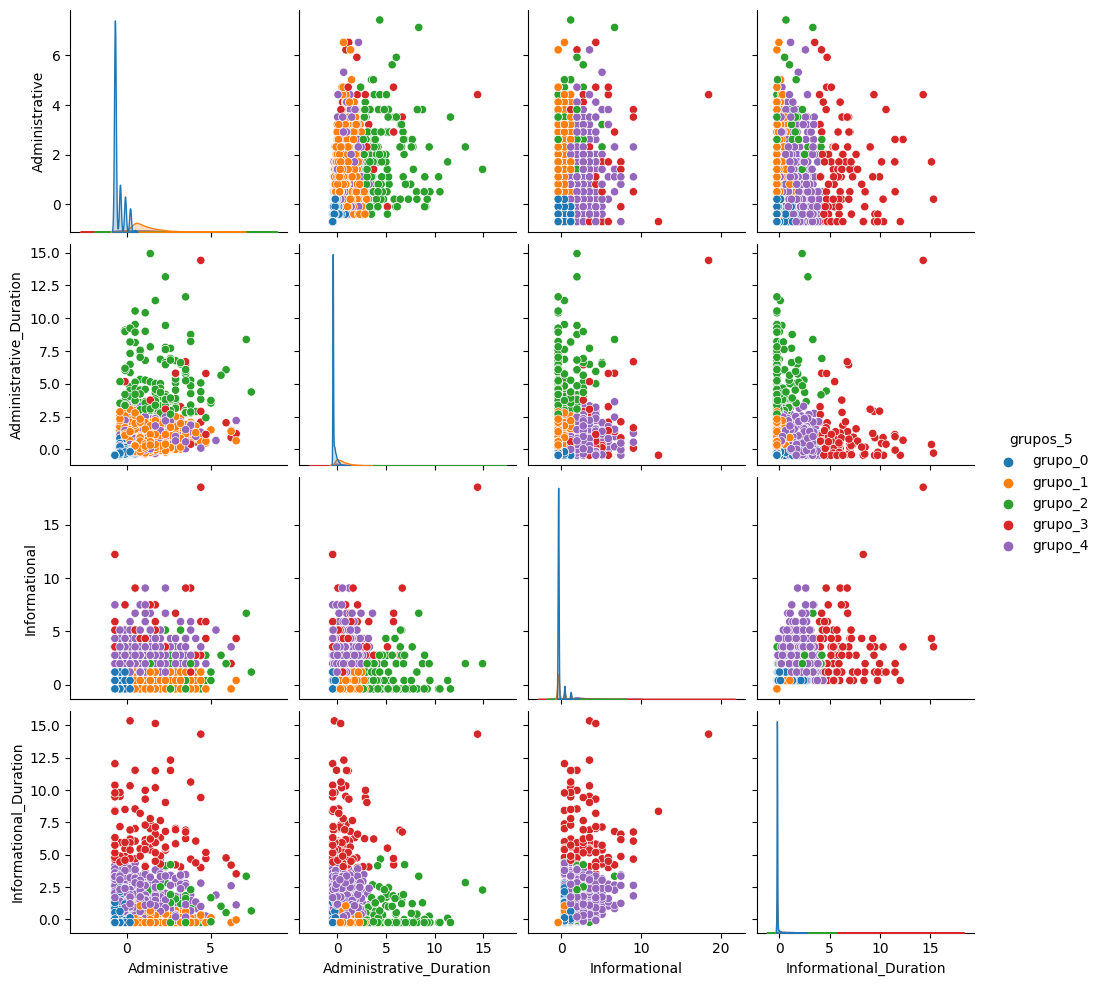

In [22]:
sns.pairplot(X_train_sinu[variaveis], hue=grupos)
plt.show()

### Grupo 4

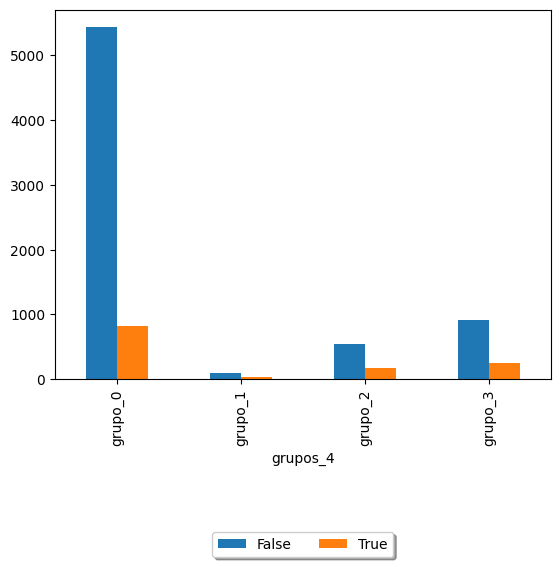

In [23]:
grupos = 'grupos_4'
ax = X_train_sinu.groupby([grupos, 'y'])['y'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

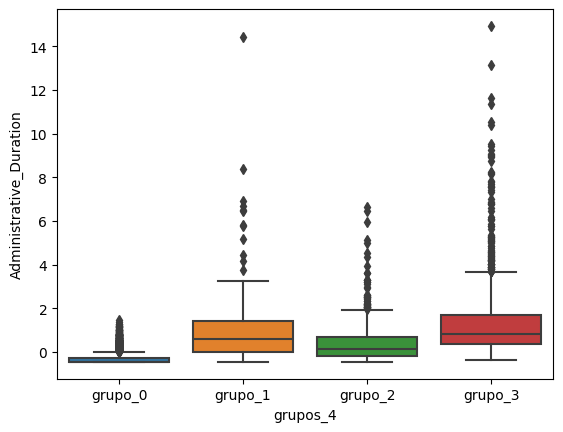

In [24]:
sns.boxplot(data=X_train_sinu, y=X_train_sinu.columns[1], x=grupos)
plt.show()

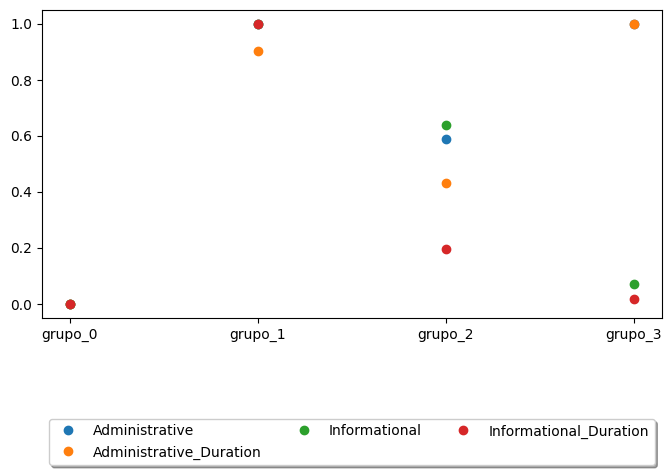

In [25]:
variaveis = X_train_sinu.columns[:4]
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_train_sinu.groupby([grupos])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [26]:
pd.crosstab(X_train_sinu['y'], X_train_sinu[grupos])

grupos_4  grupo_0  grupo_1  grupo_2  grupo_3
y                                           
False        5435       92      547      912
True          814       38      179      244

In [27]:
variaveis = list(X_train_sinu.columns[:4])
variaveis.append(grupos)
variaveis

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'grupos_4']

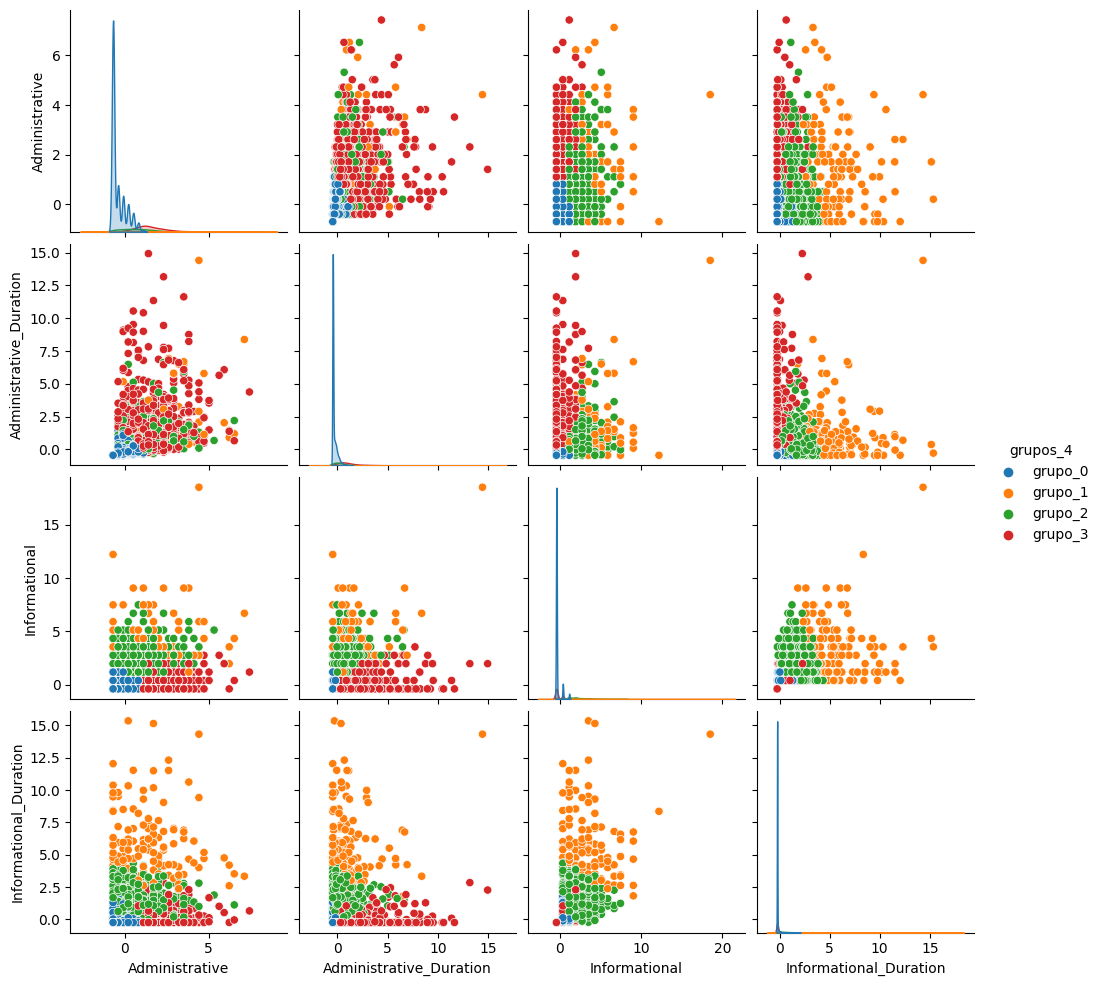

In [28]:
sns.pairplot(X_train_sinu[variaveis], hue=grupos)
plt.show()

### Grupo 3

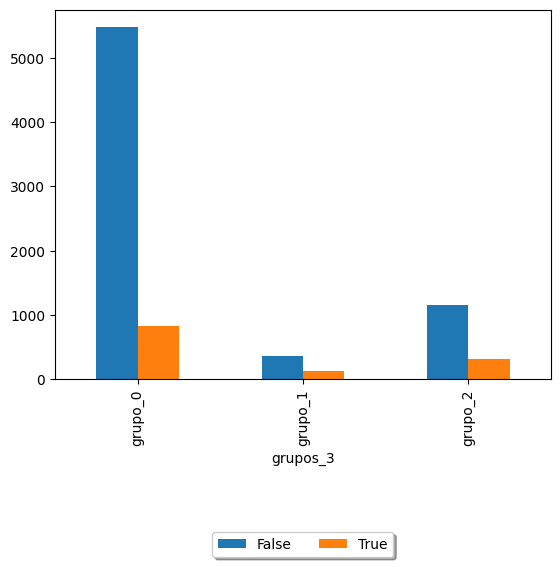

In [29]:
grupos = 'grupos_3'
ax = X_train_sinu.groupby([grupos, 'y'])['y'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

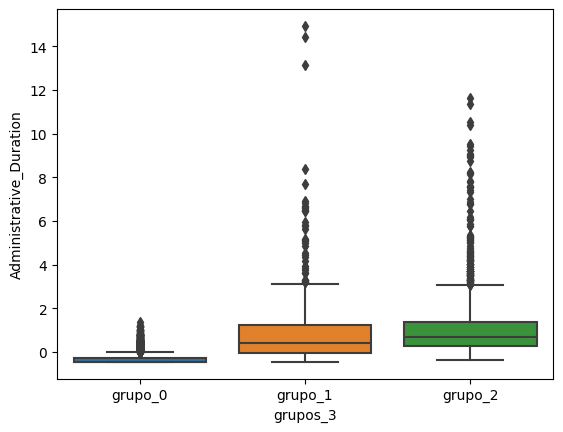

In [30]:
sns.boxplot(data=X_train_sinu, y=X_train_sinu.columns[1], x=grupos)
plt.show()

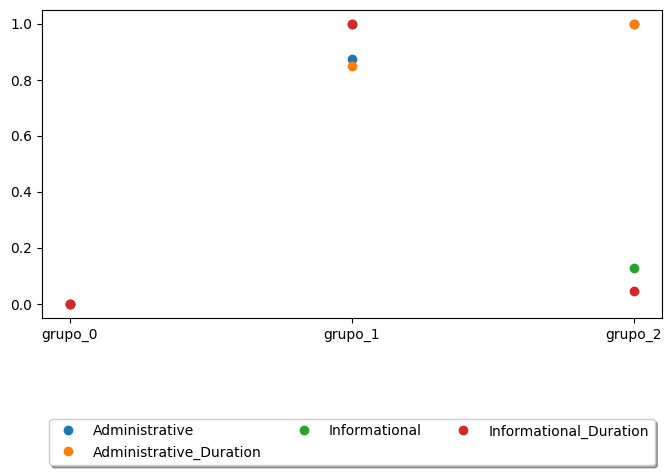

In [31]:
variaveis = X_train_sinu.columns[:4]
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_train_sinu.groupby([grupos])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [32]:
pd.crosstab(X_train_sinu['y'], X_train_sinu[grupos])

grupos_3  grupo_0  grupo_1  grupo_2
y                                  
False        5476      354     1156
True          833      132      310

In [33]:
variaveis = list(X_train_sinu.columns[:4])
variaveis.append(grupos)
variaveis

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'grupos_3']

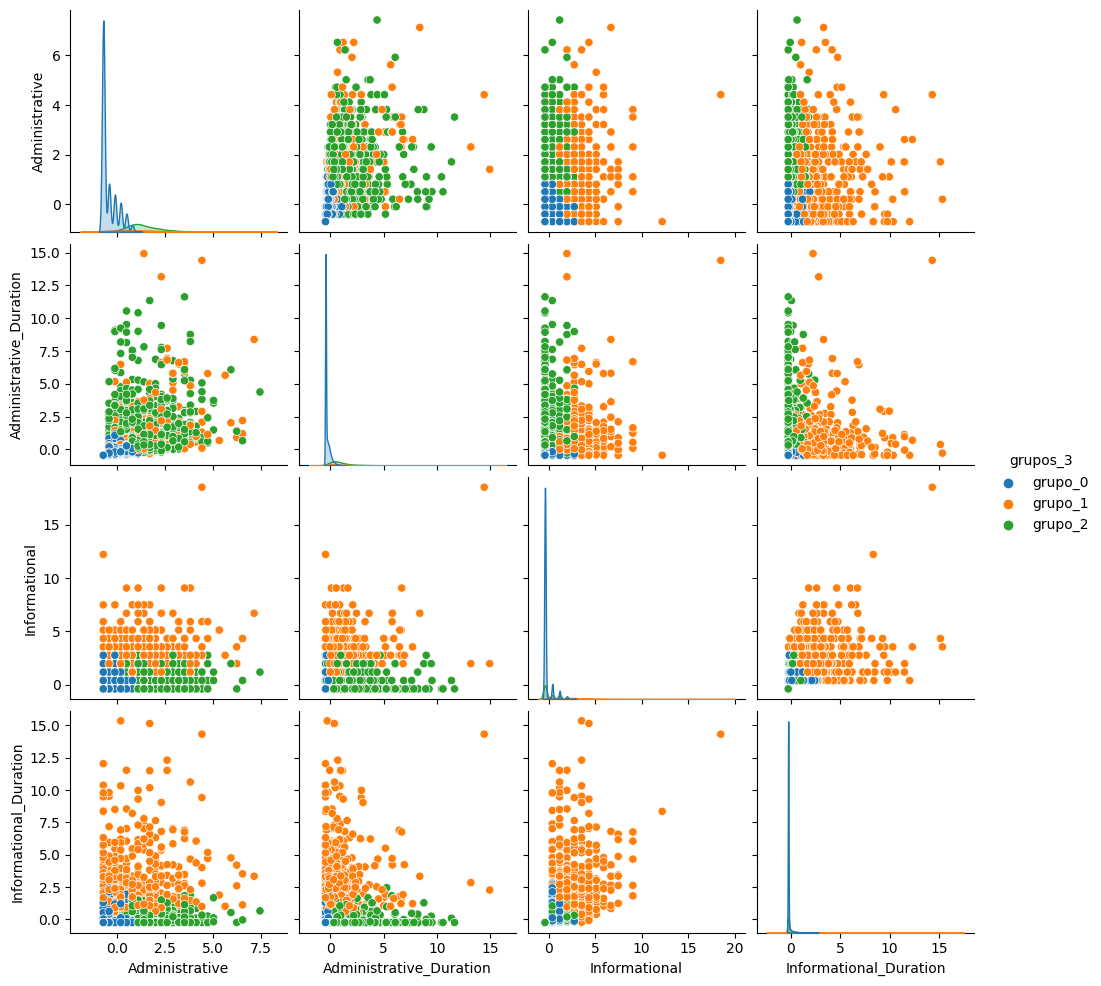

In [34]:
sns.pairplot(X_train_sinu[variaveis], hue=grupos)
plt.show()

### Grupo 2

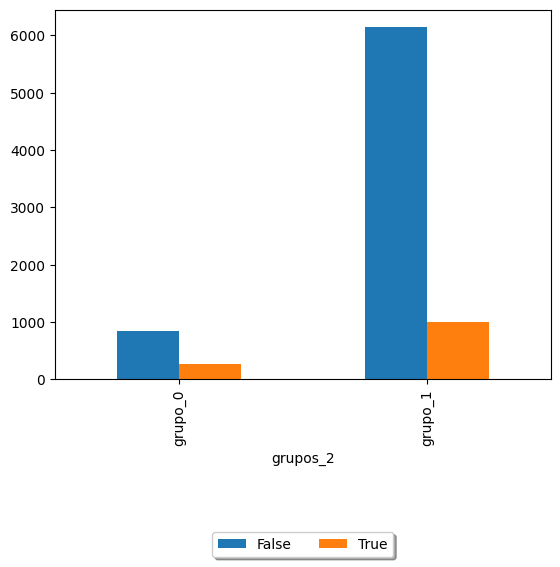

In [35]:
grupos = 'grupos_2'
ax = X_train_sinu.groupby([grupos, 'y'])['y'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

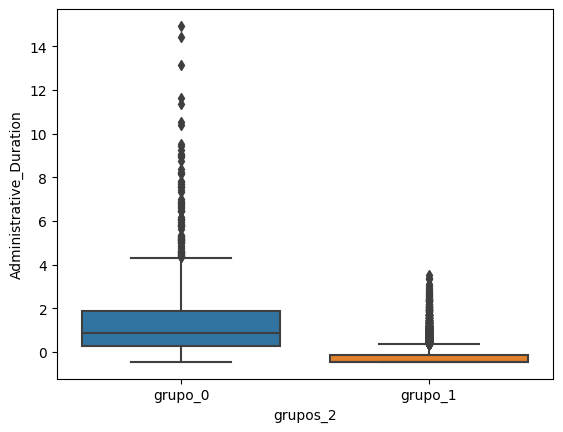

In [36]:
sns.boxplot(data=X_train_sinu, y=X_train_sinu.columns[1], x=grupos)
plt.show()

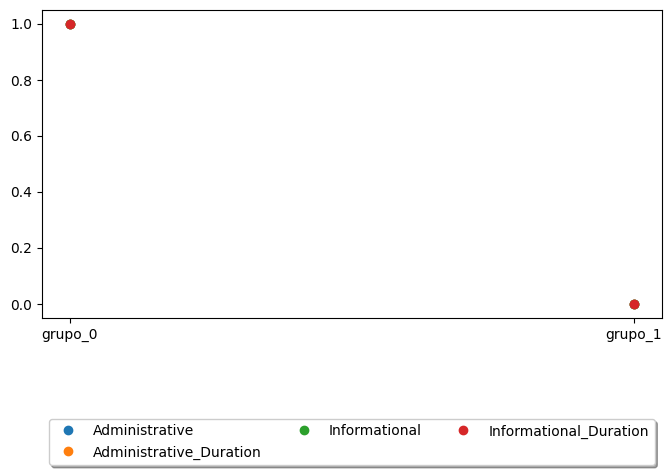

In [37]:
variaveis = X_train_sinu.columns[:4]
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_train_sinu.groupby([grupos])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [38]:
pd.crosstab(X_train_sinu['y'], X_train_sinu[grupos])

grupos_2  grupo_0  grupo_1
y                         
False         841     6145
True          270     1005

In [39]:
variaveis = list(X_train_sinu.columns[:4])
variaveis.append(grupos)
variaveis

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'grupos_2']

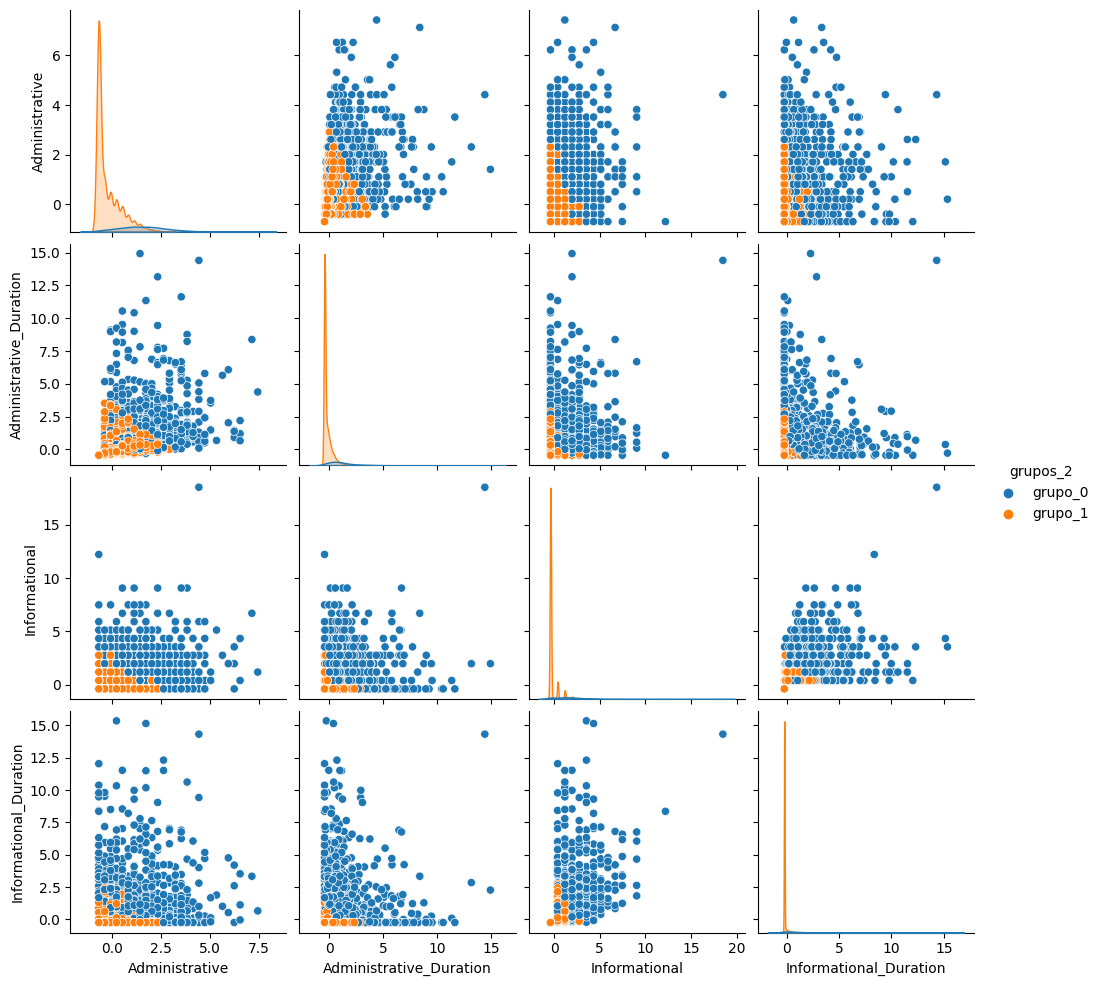

In [40]:
sns.pairplot(X_train_sinu[variaveis], hue=grupos)
plt.show()

In [41]:

# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 10
X_train_sinu = X_train.copy()

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters).fit(X_train)
    # Aqui calculamos a silueta e guardamos o resultado na lista 'siluetas'
    siluetas.append(silhouette_score(X_train, km.labels_))
    # Essa list comprehendion define o nome dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    X_train_sinu['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)


  0%|          | 0/9 [00:00<?, ?it/s]

<Axes: xlabel='n_clusters'>

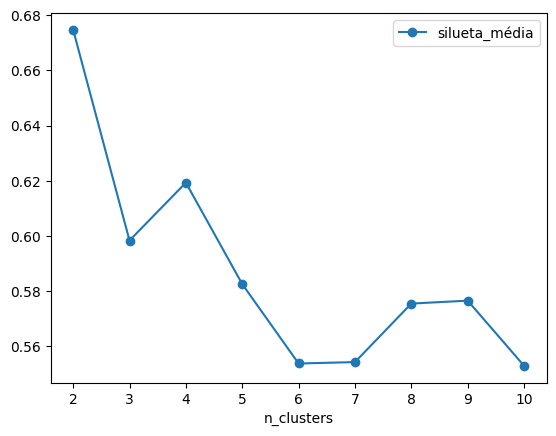

In [42]:

df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')
# plt.scatter(x = df_silueta.n_clusters, y = df_silueta.silueta_média)

# Testes no BounceRates

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [43]:
X_train, X_t, y_train, y_t = train_test_split(X_pad, y2, test_size=0.33, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_t, y_t, test_size=0.9, random_state=42)
print(f"X_train: {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"X_valid: {X_valid.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test : {y_test.shape}")
print(f"y_valid: {y_valid.shape}")

X_train: (8261, 4)
X_test : (406, 4)
X_valid: (3663, 4)
y_train: (8261, 1)
y_test : (406, 1)
y_valid: (3663, 1)


In [44]:
labels = ["25%","50%","75%"]
a = y_train.describe().iloc[:,0]['50%']
b = y_train.describe().iloc[:,0]['75%']
c = y_train.describe().iloc[:,0]['max']
bins = [-0.1, a, b, c]
bins

[-0.1, 0.003030303, 0.016666667, 0.2]

In [45]:
y2_array = np.array(y_train).reshape(1,-1)[0]
y_train_cat = pd.cut(x=y2_array, bins=bins, labels=labels)
y_train_cat[:5]

['25%', '25%', '25%', '50%', '25%']
Categories (3, object): ['25%' < '50%' < '75%']

In [46]:
X_train_sinu['y'] = y_train_cat.copy()
X_train_sinu.head()

Administrative  Administrative_Duration  Informational  \
5396        0.507228                 0.957060      -0.396478   
611         4.119891                 1.325586       4.327541   
4474       -0.696993                -0.457191      -0.396478   
2114       -0.094882                -0.287481      -0.396478   
8957        2.012504                 3.724044      -0.396478   

      Informational_Duration grupos_2 grupos_3 grupos_4 grupos_5 grupos_6  \
5396               -0.244931  grupo_0  grupo_2  grupo_0  grupo_4  grupo_5   
611                 0.805680  grupo_1  grupo_1  grupo_2  grupo_3  grupo_1   
4474               -0.244931  grupo_0  grupo_0  grupo_1  grupo_0  grupo_0   
2114               -0.244931  grupo_0  grupo_0  grupo_1  grupo_0  grupo_0   
8957               -0.244931  grupo_1  grupo_2  grupo_0  grupo_2  grupo_4   

     grupos_7 grupos_8 grupos_9 grupos_10    y  
5396  grupo_3  grupo_0  grupo_3   grupo_9  25%  
611   grupo_5  grupo_4  grupo_2   grupo_1  25%  
4474  grupo_0  grupo_1  grupo_1   grupo_2  25%  
2114  grupo_0  grupo_1  grupo_1   grupo_0  50%  
8957  grupo_6  grupo_5  grupo_7   grupo_6  25%

In [47]:
X_train_sinu.y.value_counts()

y
25%    4133
50%    2075
75%    2053
Name: count, dtype: int64

### Grupo 5

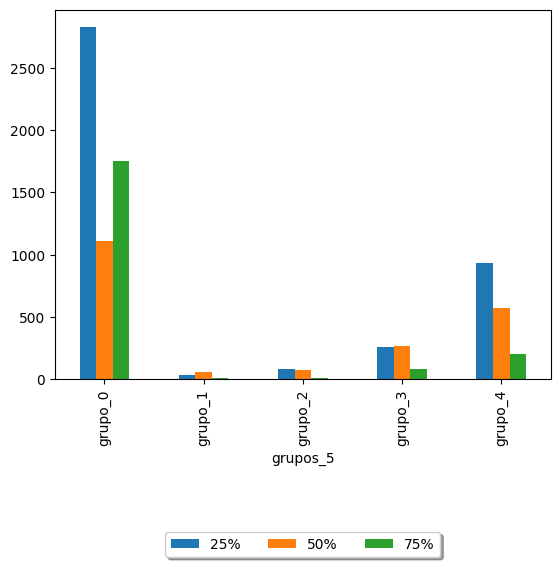

In [48]:
grupos = 'grupos_5'
ax = X_train_sinu.groupby([grupos, 'y'])['y'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

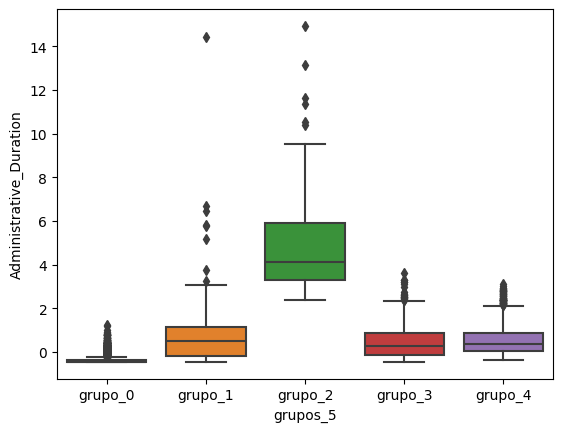

In [49]:
sns.boxplot(data=X_train_sinu, y=X_train_sinu.columns[1], x=grupos)
plt.show()

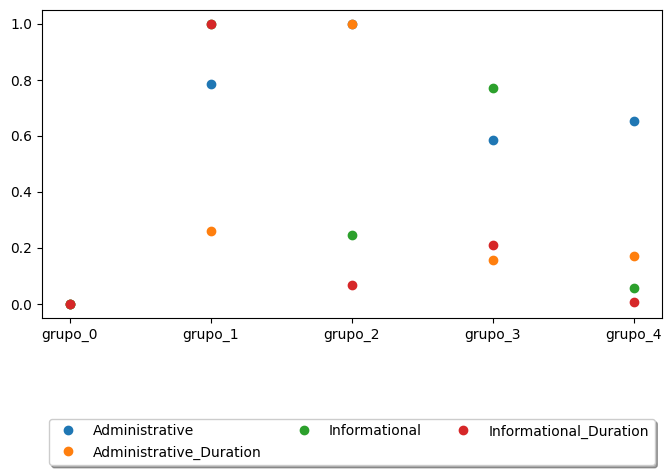

In [50]:
variaveis = X_train_sinu.columns[:4]
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_train_sinu.groupby([grupos])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [51]:
pd.crosstab(X_train_sinu['y'], X_train_sinu[grupos])

grupos_5  grupo_0  grupo_1  grupo_2  grupo_3  grupo_4
y                                                    
25%          2826       30       83      262      932
50%          1106       59       72      264      574
75%          1750       10       11       79      203

In [52]:
variaveis = list(X_train_sinu.columns[:4])
variaveis.append(grupos)
variaveis

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'grupos_5']

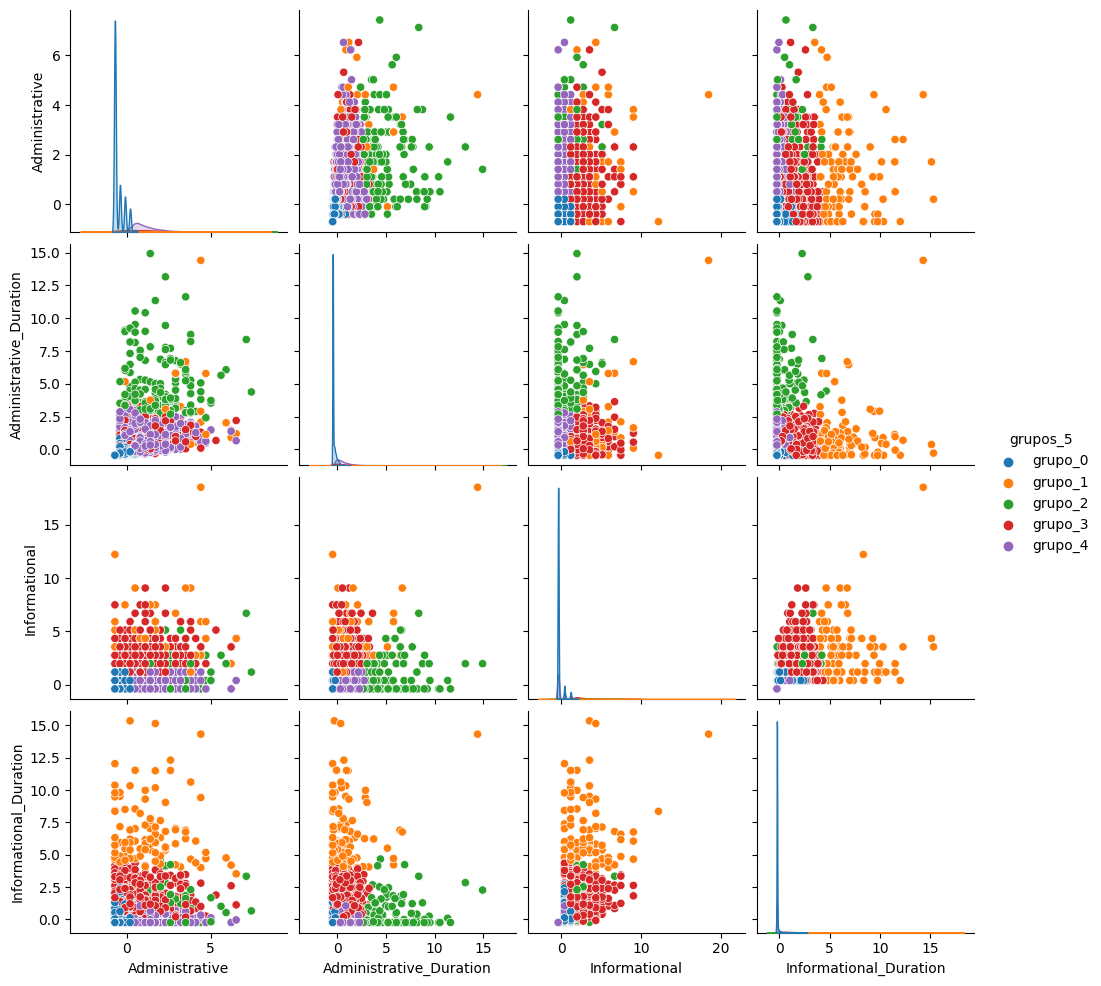

In [53]:
sns.pairplot(X_train_sinu[variaveis], hue=grupos)
plt.show()

### Grupo 4

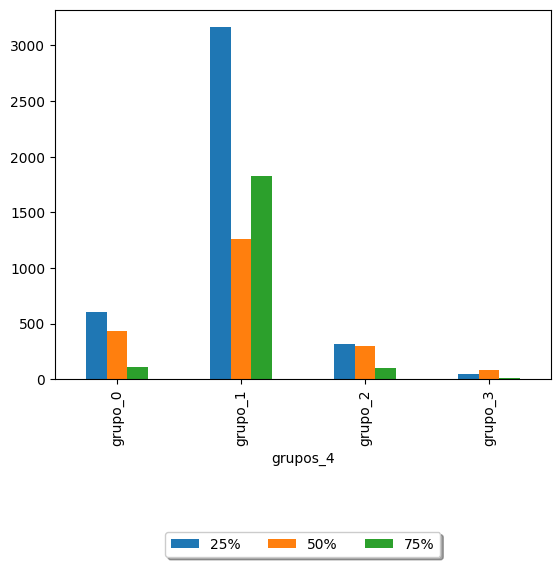

In [54]:
grupos = 'grupos_4'
ax = X_train_sinu.groupby([grupos, 'y'])['y'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

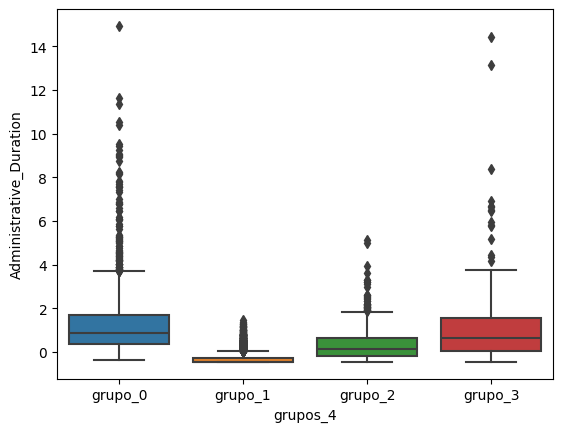

In [55]:
sns.boxplot(data=X_train_sinu, y=X_train_sinu.columns[1], x=grupos)
plt.show()

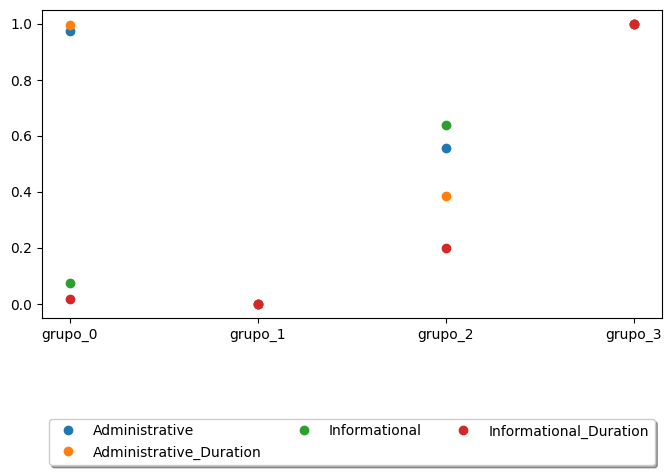

In [56]:
variaveis = X_train_sinu.columns[:4]
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_train_sinu.groupby([grupos])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [57]:
pd.crosstab(X_train_sinu['y'], X_train_sinu[grupos])

grupos_4  grupo_0  grupo_1  grupo_2  grupo_3
y                                           
25%           607     3165      317       44
50%           436     1259      301       79
75%           112     1827      100       14

In [58]:
variaveis = list(X_train_sinu.columns[:4])
variaveis.append(grupos)
variaveis

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'grupos_4']

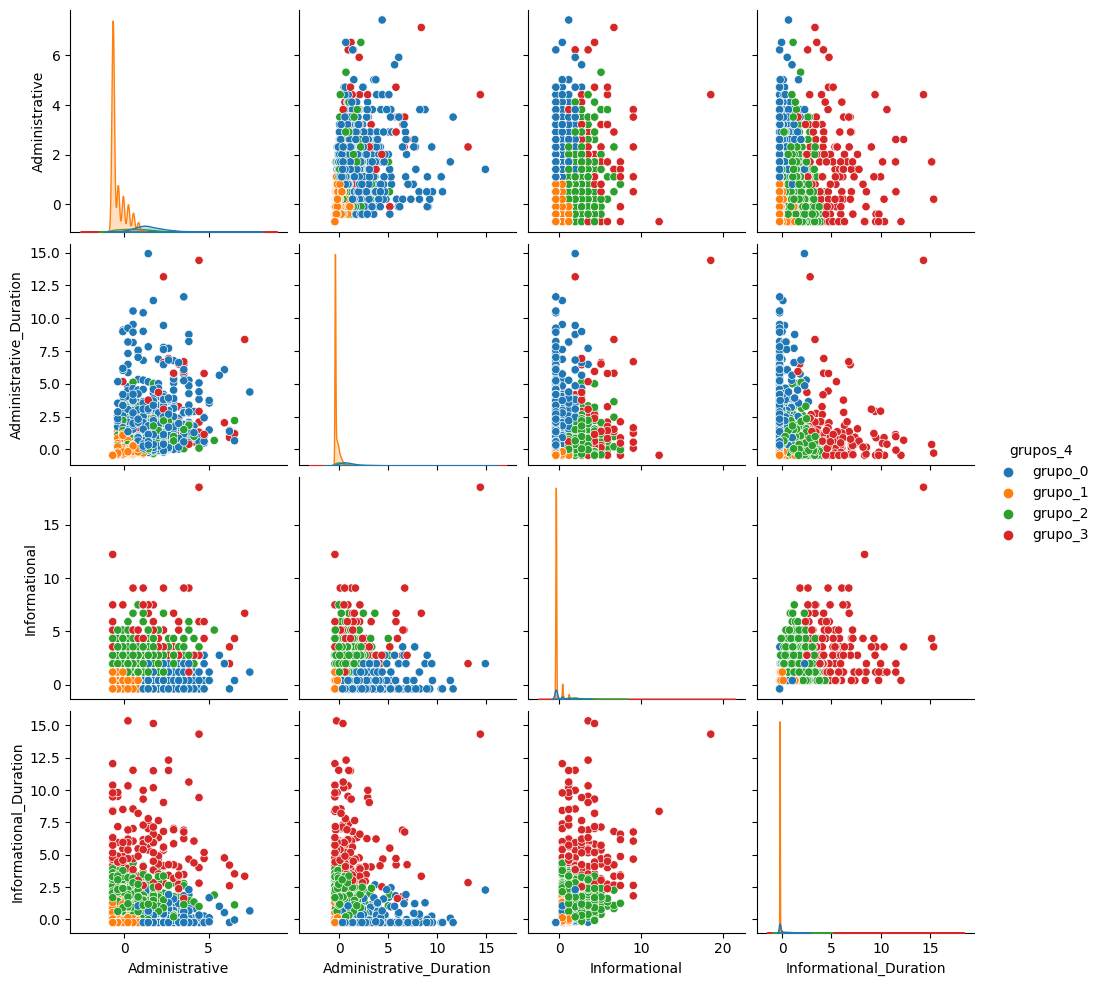

In [59]:
sns.pairplot(X_train_sinu[variaveis], hue=grupos)
plt.show()

### Grupo 3

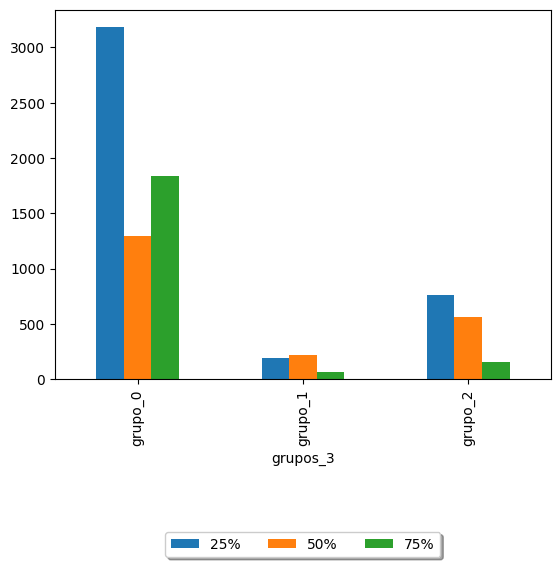

In [60]:
grupos = 'grupos_3'
ax = X_train_sinu.groupby([grupos, 'y'])['y'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

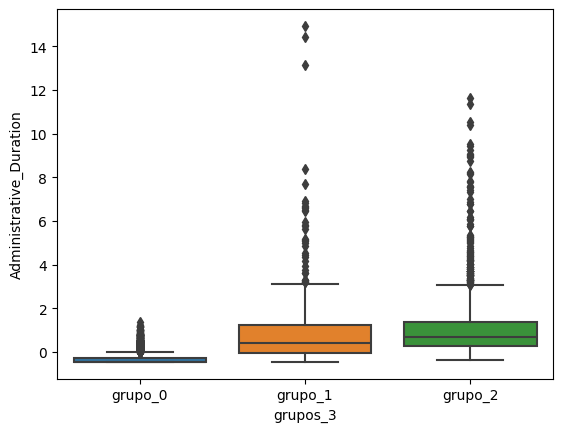

In [61]:
sns.boxplot(data=X_train_sinu, y=X_train_sinu.columns[1], x=grupos)
plt.show()

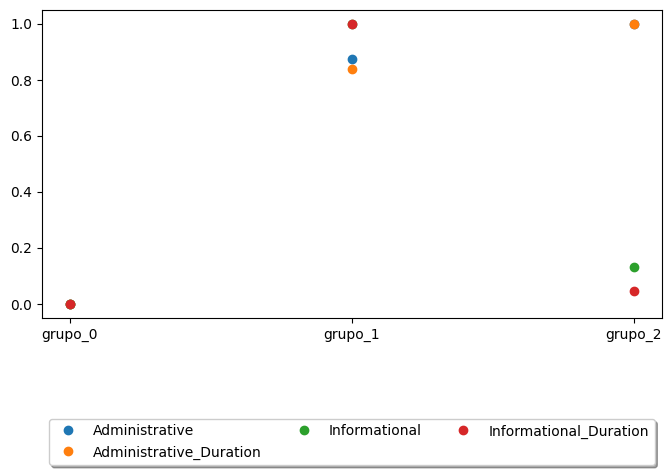

In [62]:
variaveis = X_train_sinu.columns[:4]
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_train_sinu.groupby([grupos])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [63]:
pd.crosstab(X_train_sinu['y'], X_train_sinu[grupos])

grupos_3  grupo_0  grupo_1  grupo_2
y                                  
25%          3182      193      758
50%          1295      222      558
75%          1836       62      155

In [64]:
variaveis = list(X_train_sinu.columns[:4])
variaveis.append(grupos)
variaveis

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'grupos_3']

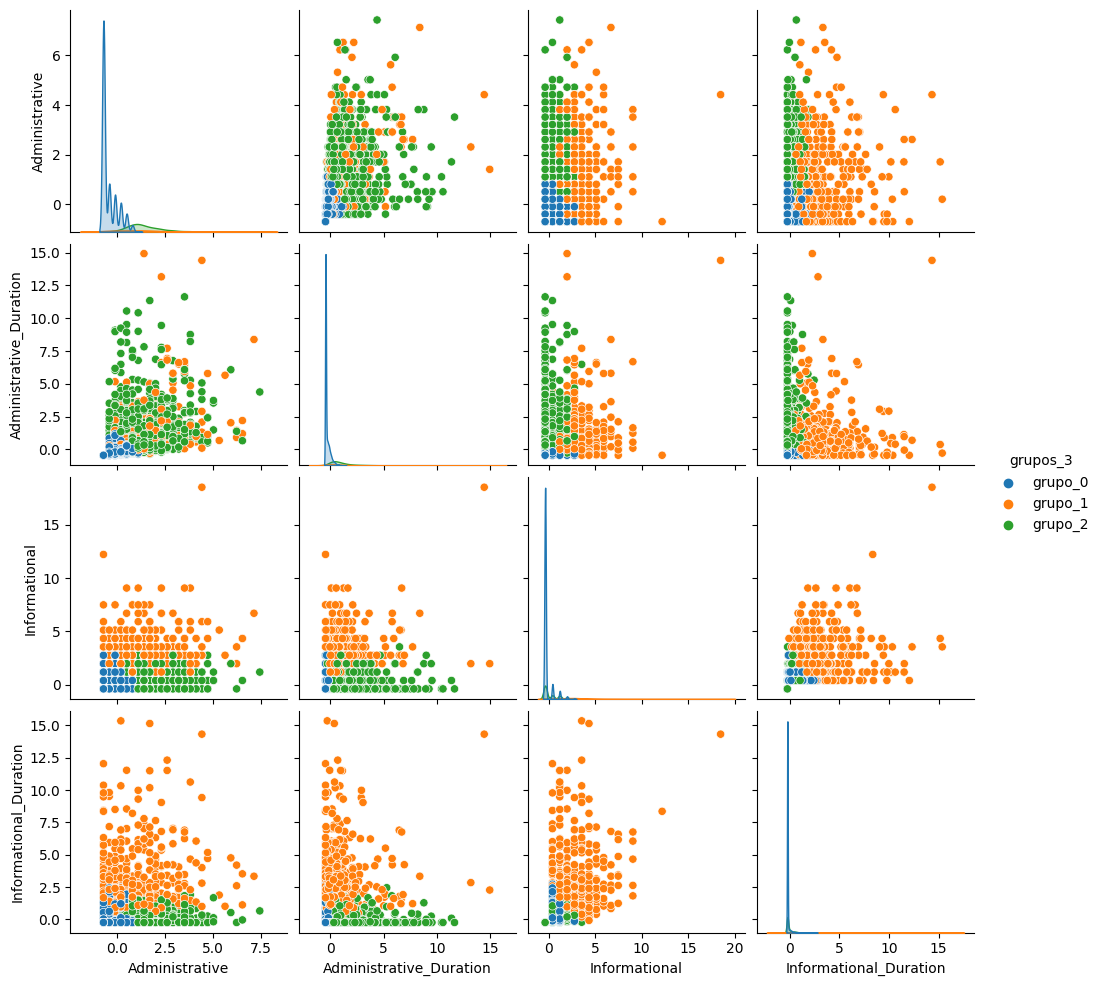

In [65]:
sns.pairplot(X_train_sinu[variaveis], hue=grupos)
plt.show()

### Grupo 2

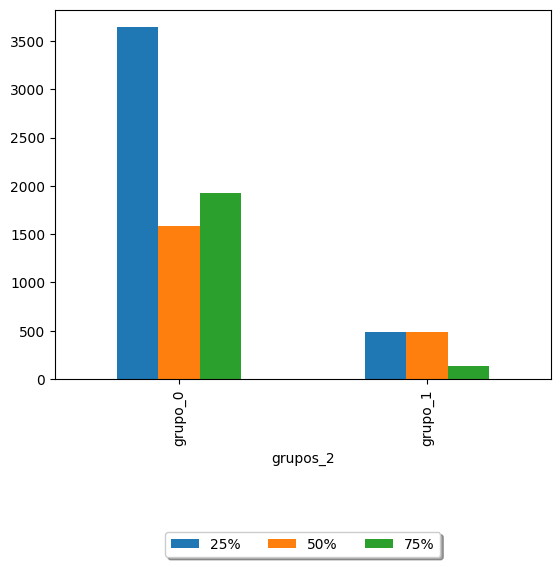

In [66]:
grupos = 'grupos_2'
ax = X_train_sinu.groupby([grupos, 'y'])['y'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

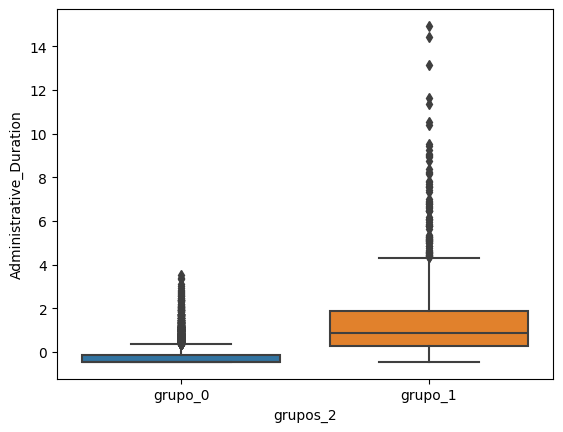

In [67]:
sns.boxplot(data=X_train_sinu, y=X_train_sinu.columns[1], x=grupos)
plt.show()

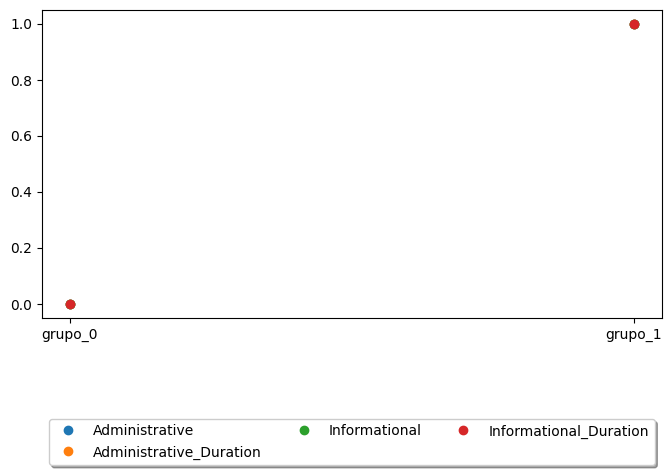

In [68]:
variaveis = X_train_sinu.columns[:4]
padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_train_sinu.groupby([grupos])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [69]:
pd.crosstab(X_train_sinu['y'], X_train_sinu[grupos])

grupos_2  grupo_0  grupo_1
y                         
25%          3642      491
50%          1587      488
75%          1921      132

In [70]:
variaveis = list(X_train_sinu.columns[:4])
variaveis.append(grupos)
variaveis

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'grupos_2']

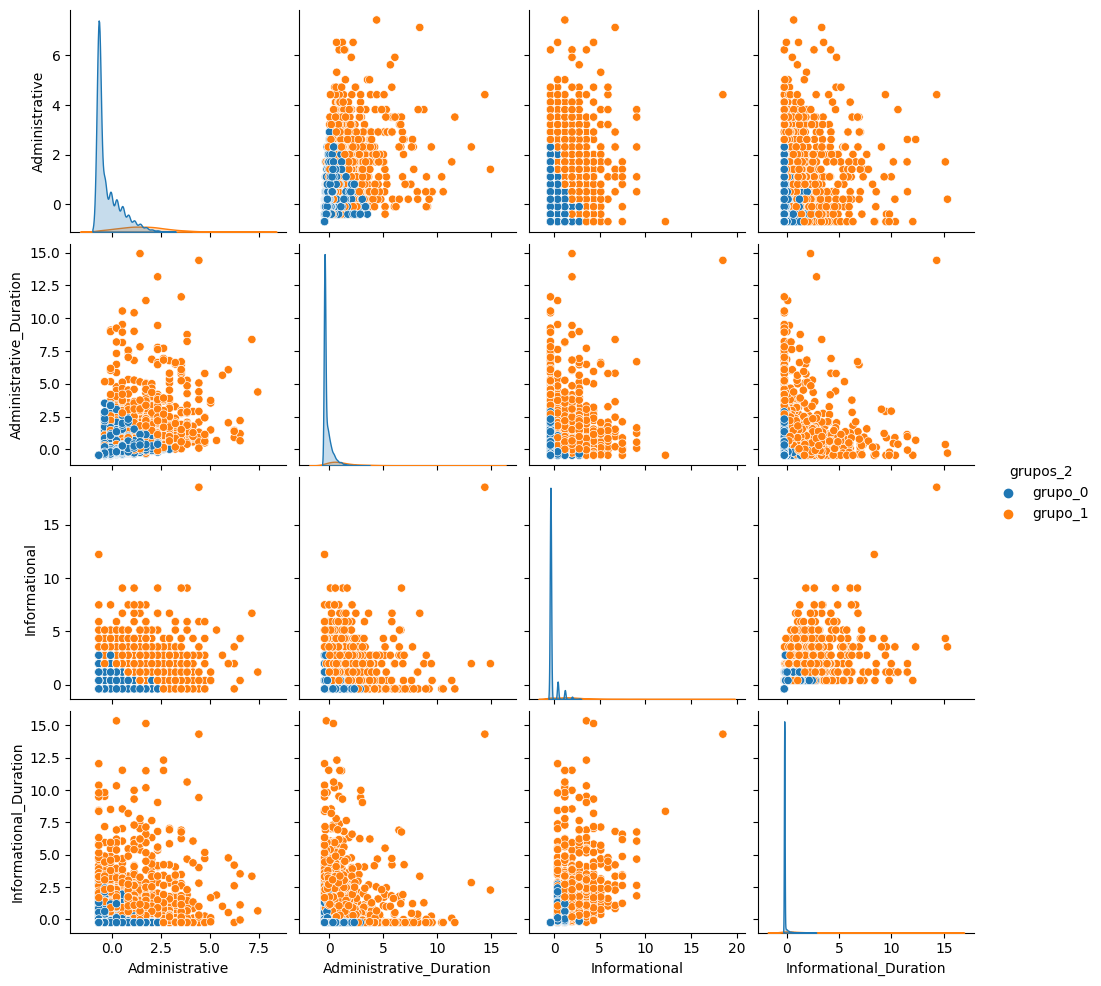

In [71]:
sns.pairplot(X_train_sinu[variaveis], hue=grupos)
plt.show()

# Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

Não foi possível determinar grupos de pagadores usando o algoritmo k-means.